In [1]:
import pandas as pd
import texthero as hero
import sys
sys.path.insert(0,'../src/')
from utils import preprocess_text, STOPWORDS
from datetime import datetime

In [ ]:
def preprocess_text(s):
    s = hero.fillna(s)
    s = hero.lowercase(s)
    s = hero.remove_digits(s)
    s = hero.remove_punctuation(s)
    s = hero.remove_diacritics(s)
    s = hero.remove_whitespace(s)
    return s

STOPWORDS = ["e", "te", "i", "me", "qe", "ne", "nje", "a", "per", "sh", "nga", "ka", "u", "eshte", "dhe", "shih", "nuk",
             "m", "dicka", "ose", "si", "shume", "etj", "se", "pa", "sipas", "s", "t", "dikujt", "dike", "mire", "vet",
             "bej", "ai", "vend", "prej", "ja", "duke", "tjeter", "kur", "ia", "ku", "ta", "keq", "dy", "ben", "bere",
             "behet", "dickaje", "edhe", "madhe", "la", "sa", "gjate", "zakonisht", "pas", "veta", "mbi", "disa", "iu",
             "mos", "c", "para", "dikush", "gje", "be", "pak", "tek", "fare", "beri", "po", "bie", "k", "do", "gjithe",
             "vete", "mund", "kam", "le", "jo", "beje", "tij", "kane", "ishte", "jane", "vjen", "ate", "kete", "neper",
             "cdo", "na", "marre", "merr", "mori", "rri", "deri", "b", "kishte", "mban", "perpara", "tyre", "marr",
             "gjitha", "as", "vetem", "nen", "here", "tjera", "tjeret", "drejt", "qenet", "ndonje", "nese", "jap",
             "merret", "rreth", "lloj", "dot", "saj", "nder", "ndersa", "cila", "veten", "ma", "ndaj", "mes", "ajo",
             "cilen", "por", "ndermjet", "prapa", "mi", "tere", "jam", "ashtu", "kesaj", "tille", "behem", "cilat",
             "kjo", "menjehere", "ca", "je", "aq", "aty", "prane", "ato", "pasur", "qene", "cilin", "teper", "njera",
             "tej", "krejt", "kush", "bejne", "ti", "bene", "midis", "cili", "ende", "keto", "kemi", "sic", "kryer",
             "cilit", "atij", "gjithnje", "andej", "siper", "sikur", "ketej", "ciles", "ky", "papritur", "ua",
             "kryesisht", "gjithcka", "pasi", "kryhet", "mjaft", "ketij", "perbashket", "ata", "atje", "vazhdimisht",
             "kurre", "tone", "keshtu", "une", "sapo", "rralle", "vetes", "ishin", "afert", "tjetren", "ketu", "cfare",
             "to", "anes", "jemi", "asaj", "secila", "kundrejt", "ketyre", "pse", "tilla", "mua", "nepermjet", "cilet",
             "ndryshe", "kishin", "ju", "tani", "atyre", "dic", "yne", "kudo", "sone", "sepse", "cilave", "kem", "ty",
             "t'i", "nbsp", "tha", "re", "the"]

In [21]:
# load data
df = pd.read_csv(
    '../data/processed/Kosovo-News-Articles.csv',
    dtype={"content":str, "title":str, "category":str, "author":str, 'source':str},
    parse_dates=['date']
)

In [22]:
# subselect only 10000 rows because of memory issues
df = df.sample(10000) 

In [23]:
# Applying preprocessing function
df['content'] = preprocess_text(df['content'])

In [24]:
# Remove stopwords
df['content_without_stopwords'] = df['content'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)])
)

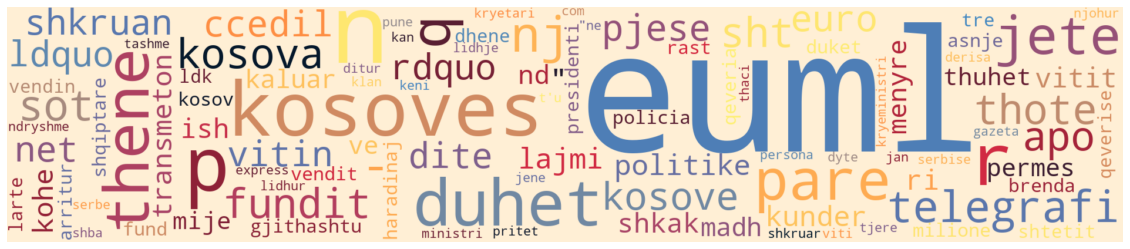

In [25]:
# Generate wordcloud
hero.wordcloud(df['content_without_stopwords'], max_words=100, width=1900, height=400)